In [1]:
import pandas as pd
import numpy as np
data=pd.read_excel("Bupa1.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   345 non-null    int64  
 1   F1      345 non-null    int64  
 2   F2      345 non-null    int64  
 3   F3      345 non-null    int64  
 4   F4      345 non-null    int64  
 5   F5      345 non-null    int64  
 6   F6      345 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [2]:
data.Class.value_counts()

1    200
0    145
Name: Class, dtype: int64

In [3]:
X_features=list(data.columns)
X_features.remove('Class')
X_features

['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

In [4]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
Y=data.Class
X=data[['F1', 'F2', 'F3', 'F4', 'F5', 'F6']]
X=sm.add_constant(X)

train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=42)

In [5]:
#SVM 
# kernel : linear
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(train_X, train_y)


SVC(kernel='linear', random_state=42)

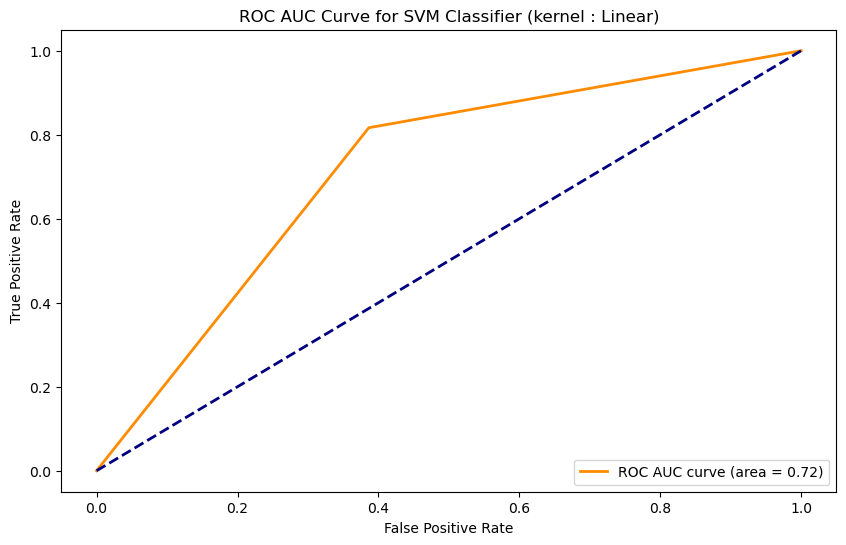

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
scores_y = svm_classifier.predict(test_X)
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for SVM Classifier (kernel : Linear)')
plt.legend(loc='lower right')
plt.show()

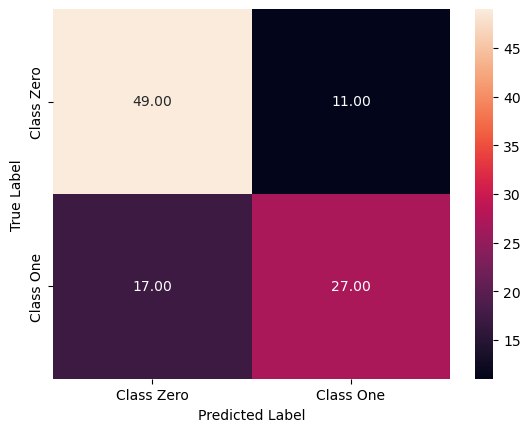

In [10]:
pred_y = svm_classifier.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [11]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        44
           1       0.74      0.82      0.78        60

    accuracy                           0.73       104
   macro avg       0.73      0.72      0.72       104
weighted avg       0.73      0.73      0.73       104



In [28]:
# kernel : polynomial
svm_classifier = SVC(kernel='poly', C=1.0, random_state=42)
svm_classifier.fit(train_X, train_y)


SVC(kernel='poly', random_state=42)

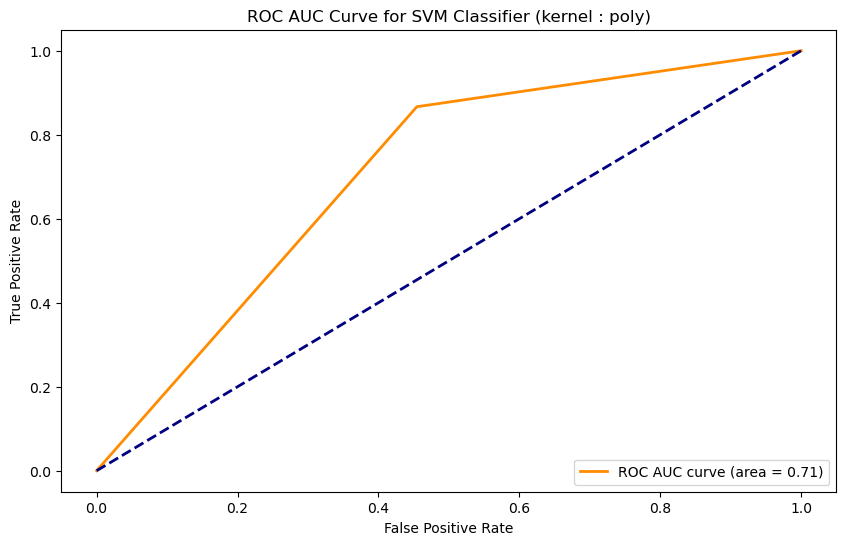

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
scores_y = svm_classifier.predict(test_X)
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for SVM Classifier (kernel : poly)')
plt.legend(loc='lower right')
plt.show()

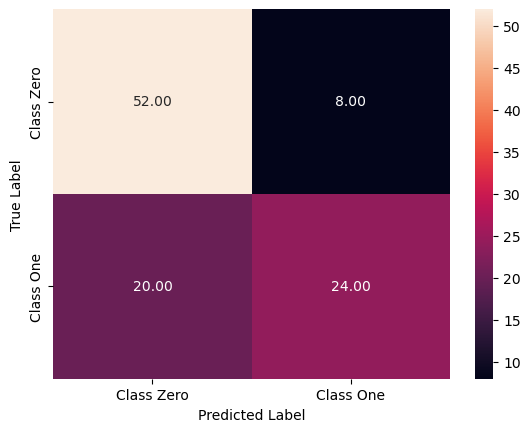

In [30]:
pred_y = svm_classifier.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [31]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        44
           1       0.72      0.87      0.79        60

    accuracy                           0.73       104
   macro avg       0.74      0.71      0.71       104
weighted avg       0.73      0.73      0.72       104



In [19]:
#kernel : rbf
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(train_X, train_y)

SVC(random_state=42)

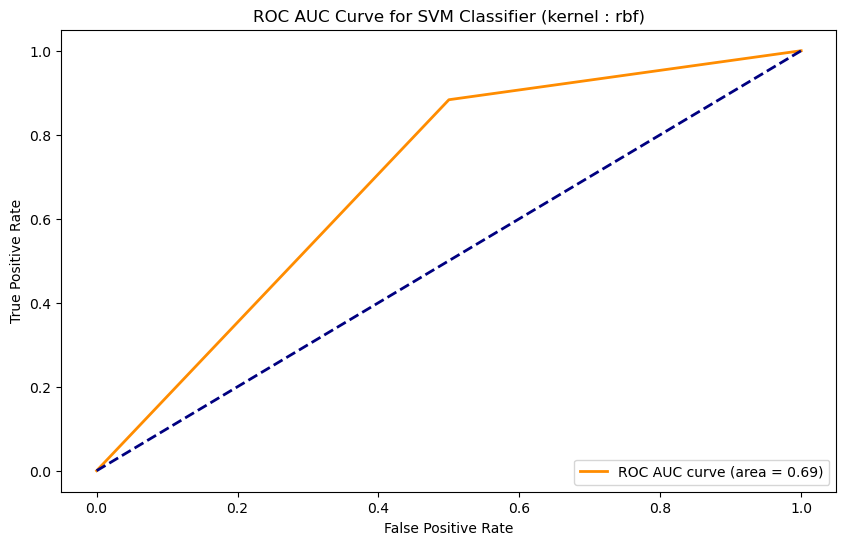

In [20]:
scores_y = svm_classifier.predict(test_X)
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for SVM Classifier (kernel : rbf)')
plt.legend(loc='lower right')
plt.show()

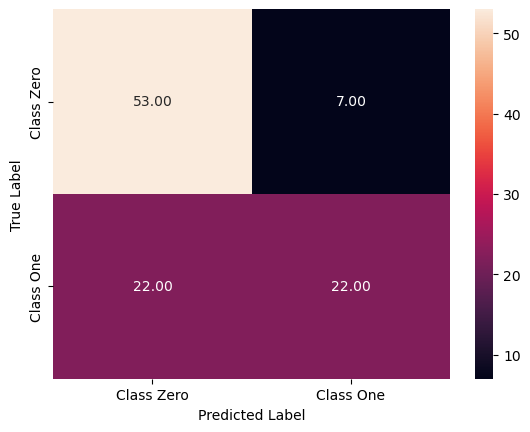

In [21]:
pred_y = svm_classifier.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [22]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60        44
           1       0.71      0.88      0.79        60

    accuracy                           0.72       104
   macro avg       0.73      0.69      0.69       104
weighted avg       0.73      0.72      0.71       104



In [23]:
# kernel : sigmoid
svm_classifier = SVC(kernel='sigmoid', C=1.0, random_state=42)
svm_classifier.fit(train_X, train_y)

SVC(kernel='sigmoid', random_state=42)

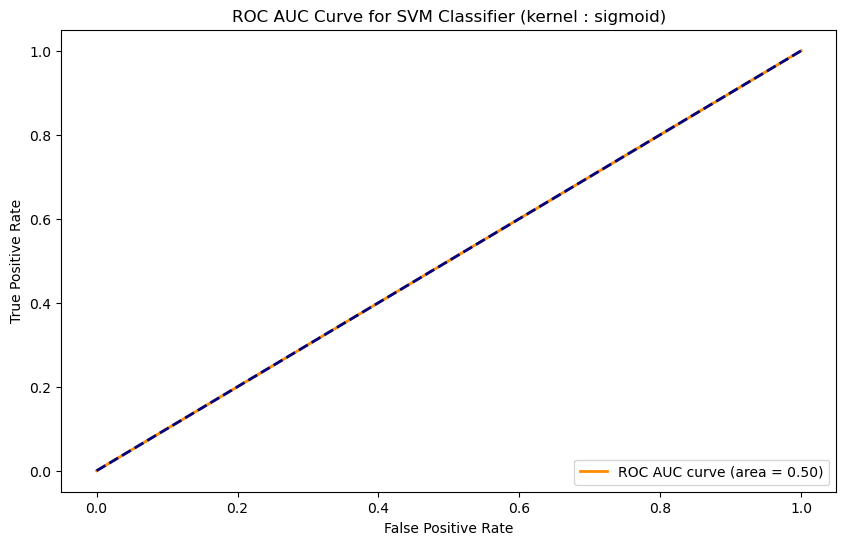

In [24]:
scores_y = svm_classifier.predict(test_X)
fpr,tpr, _=roc_curve(test_y,scores_y)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for SVM Classifier (kernel : sigmoid)')
plt.legend(loc='lower right')
plt.show()

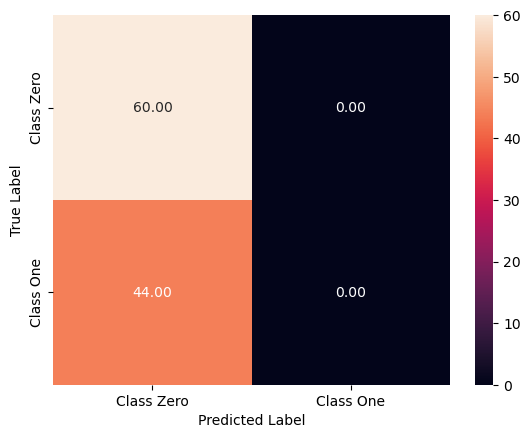

In [25]:
pred_y = svm_classifier.predict(test_X)
from sklearn import metrics
import seaborn as sn
def draw_cm( actual, predicted):
    cm = metrics.confusion_matrix(actual,predicted,labels = [1,0])
    sn.heatmap(cm, annot = True, fmt = '.2f',xticklabels = ["Class Zero","Class One"],yticklabels = ["Class Zero","Class One"])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
draw_cm(test_y,pred_y)

In [26]:
print(metrics.classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.58      1.00      0.73        60

    accuracy                           0.58       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.33      0.58      0.42       104



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
